# Spotify

Données disponibles directement [ici](spotify_dataset.csv)

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
spotify = pandas.read_csv("spotify_dataset.csv")
spotify

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


In [3]:
spotify_qt = spotify[["danceability", "energy", "loudness", "speechiness", 
                      "acousticness", "instrumentalness", "liveness", "valence", 
                      "tempo", "duration_ms", "chorus_hit"]]
spotify_qt

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
0,0.417,0.620,-7.727,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,32.94975
1,0.498,0.505,-12.475,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,48.82510
2,0.657,0.649,-13.392,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,37.22663
3,0.590,0.545,-12.058,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,24.75484
4,0.515,0.765,-3.515,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,21.79874
...,...,...,...,...,...,...,...,...,...,...,...
41094,0.172,0.358,-14.430,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,24.30824
41095,0.910,0.366,-9.954,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,32.53856
41096,0.719,0.804,-4.581,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,20.73371
41097,0.600,0.177,-16.070,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,21.65301


## Pour information

L'application de la CAH sur les 41000 lignes prend moins d'une minute.

In [4]:
%%time
hac_complet = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(spotify_qt)

CPU times: user 54.4 s, sys: 3.43 s, total: 57.9 s
Wall time: 57.8 s


## Kmeans avec $k=100$

In [5]:
%%time
kmeans_100 = KMeans(n_clusters = 100).fit(spotify_qt)

CPU times: user 30.6 s, sys: 16.9 s, total: 47.5 s
Wall time: 3.3 s


In [6]:
kmeans_1 = KMeans(n_clusters = 1).fit(spotify_qt)

In [7]:
numpy.round(1 - kmeans_100.inertia_ / kmeans_1.inertia_, 4)

0.9997

In [8]:
centres = spotify_qt.assign(classe = kmeans_100.labels_).groupby("classe").mean()
centres

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.541403,0.592784,-9.548604,0.073828,0.358552,0.120722,0.199911,0.565881,120.252142,1.927931e+05,40.381834
1,0.357923,0.513231,-12.961308,0.052338,0.370659,0.350225,0.213669,0.371700,103.799000,9.290990e+05,40.203215
2,0.543228,0.607398,-10.318243,0.075064,0.297999,0.162695,0.207676,0.519095,121.963524,3.161797e+05,43.174567
3,0.394564,0.501516,-13.253787,0.068091,0.422074,0.398389,0.228645,0.330335,114.766960,5.538048e+05,51.051708
4,0.675000,0.007660,-32.584000,0.300000,0.996000,0.970000,0.099400,0.380000,130.817000,4.170227e+06,29.463060
...,...,...,...,...,...,...,...,...,...,...,...
95,0.559866,0.614377,-9.264865,0.071734,0.307353,0.106344,0.200991,0.571059,121.099711,2.056000e+05,40.026988
96,0.329556,0.314689,-17.269222,0.121778,0.799444,0.318789,0.154311,0.275100,104.091333,9.620658e+05,36.486248
97,0.456947,0.514006,-12.956935,0.096391,0.529867,0.316809,0.227993,0.520480,119.820763,1.072602e+05,37.346777


In [9]:
corresp01 = pandas.DataFrame({"step0" : spotify_qt.index, "step1" : kmeans_100.labels_})
corresp01

,step0,step1
0,0,47
1,1,10
2,2,55
3,3,73
4,4,63
...,...,...
41094,41094,29
41095,41095,29
41096,41096,37
41097,41097,10


## CAH sur les centres

In [10]:
%%time
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(centres)

CPU times: user 3.18 ms, sys: 566 µs, total: 3.75 ms
Wall time: 3.62 ms


In [11]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

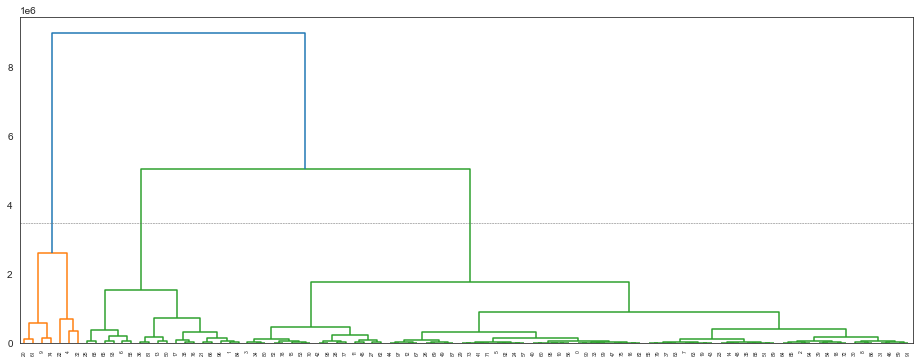

In [20]:
plt.figure(figsize = (16, 6))
plot_dendrogram(hac)
plt.axhline(y = 3.5e6, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

In [21]:
%%time
hac3 = AgglomerativeClustering(n_clusters = 3).fit(centres)

CPU times: user 2.44 ms, sys: 621 µs, total: 3.06 ms
Wall time: 2.96 ms


In [22]:
hac3.labels_

array([1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1])

In [23]:
corresp12 = pandas.DataFrame({"step1" : centres.index, "step2" : hac3.labels_})
corresp12

,step1,step2
0,0,1
1,1,2
2,2,1
3,3,1
4,4,0
...,...,...
95,95,1
96,96,2
97,97,1
98,98,1


In [24]:
corresp02 = corresp01.merge(corresp12)
corresp02

,step0,step1,step2
0,0,47,1
1,16,47,1
2,37,47,1
3,78,47,1
4,107,47,1
...,...,...,...
41094,27026,25,2
41095,36133,25,2
41096,29233,32,0
41097,32367,32,0


In [25]:
centres_init = spotify_qt.assign(classe = corresp02.step2).groupby("classe").mean()
centres_init

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.547400,0.528364,-9.989818,0.04590,0.327936,0.311533,0.154955,0.420364,115.732182,229074.090909,43.723579
1,0.539478,0.579137,-10.231936,0.07285,0.364858,0.154303,0.201475,0.542785,119.326716,234855.265630,40.102486
2,0.580294,0.663808,-8.131691,0.09483,0.240716,0.165948,0.215877,0.481908,121.461211,239244.558824,40.795852


## Kmeans avec donc 3 classes

In [26]:
%%time
kmeans_3 = KMeans(n_clusters = 3, init = centres_init, n_init = 1).fit(spotify_qt)

CPU times: user 587 ms, sys: 103 ms, total: 690 ms
Wall time: 67.7 ms


In [28]:
numpy.round(1 - kmeans_3.inertia_ / kmeans_1.inertia_, 4)

0.6636

In [35]:
spotify_qt.assign(classe = kmeans_3.labels_).groupby("classe").mean().round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.54,0.58,-10.04,0.07,0.38,0.13,0.20,0.57,119.58,192618.55,39.33
1,0.53,0.59,-10.66,0.07,0.31,0.22,0.20,0.47,118.85,345630.31,42.42
2,0.35,0.41,-15.41,0.10,0.61,0.42,0.24,0.28,109.43,1098421.13,46.61


## Kmeans avec 3 classes, mais en laissant l'initialisation par défaut

In [30]:
%%time
kmeans_3bis = KMeans(n_clusters = 3).fit(spotify_qt)

CPU times: user 2.85 s, sys: 2.01 s, total: 4.86 s
Wall time: 351 ms


In [31]:
numpy.round(1 - kmeans_3bis.inertia_ / kmeans_1.inertia_, 4)

0.6637

In [34]:
spotify_qt.assign(classe = kmeans_3bis.labels_).groupby("classe").mean().round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.55,0.58,-10.02,0.07,0.38,0.13,0.20,0.56,119.58,194409.38,39.39
1,0.36,0.41,-15.32,0.10,0.62,0.42,0.24,0.29,108.50,1183632.93,46.73
2,0.53,0.59,-10.81,0.07,0.32,0.23,0.20,0.47,118.73,353994.47,42.48


## Comparaison des deux classes

In [33]:
pandas.crosstab(index = kmeans_3.labels_, columns = kmeans_3bis.labels_, 
                margins = True, margins_name = "Total",
                rownames = ["Hybride"], colnames = ["Direct"])

Direct,0,1,2,Total
Hybride,,,,
0,31146,0,0,31146
1,722,0,8947,9669
2,0,229,55,284
Total,31868,229,9002,41099
